# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

<span style="color:red">Q1: 40 Q2: 41 Total 81</span>

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [189]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [190]:
# Your code goes here
auto_numeric_loc = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(auto_numeric_loc)
print("The number of data points = %d\nThe number of attributes = %d" % (len(auto_numeric.index), len(auto_numeric.columns) - 1))

The number of data points = 159
The number of attributes = 15


<span style="color:red">Good</span>

### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [191]:
# Your code goes here
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


<span style="color:red">Good</span>

### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [192]:
# Your code goes here
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<span style="color:red">Good</span>

### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

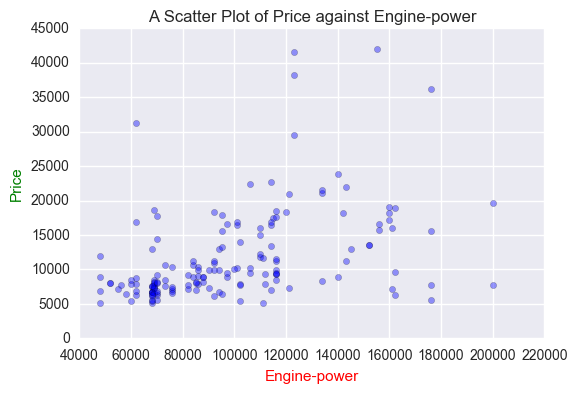

In [193]:
# Your code goes here
plt.scatter(auto_numeric['engine-power'], auto_numeric['price'], alpha = 0.4 )
plt.title('A Scatter Plot of Price against Engine-power',fontsize = 12)
plt.xlabel('Engine-power', color = 'red')
plt.ylabel('Price', color = 'green')
plt.show()

<span style="color:red">Good</span>

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*
1. Engine-power alone is not sufficient for predicting the price. Because the engine and the price is not completely linearly related. For example, when the engine energy consumption increases, the price does not rise, in some cases, low energy consumption, the price is almost as high as the situation of high energy consumption.
2. Most of the price is concentrated in the 6000-10000


<span style="color:red">Good</span>

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

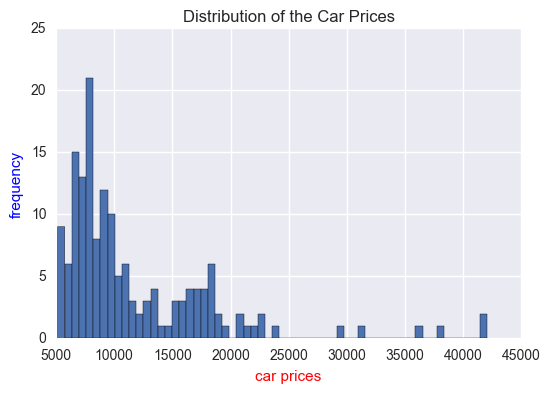

In [194]:
# Your code goes here
dis = plt.hist(auto_numeric['price'], bins = 60)
plt.xlabel('car prices', color = 'red')
plt.ylabel('frequency', color = 'blue')
plt.title(r'Distribution of the Car Prices', fontsize = 12)
plt.show()

<span style="color:red">Good</span>

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*
We should remove some outliers, for example, some of the price frequency is very small but the value is much higher than most of the price distribution of the interval.


<span style="color:red">The price variable is clearly non-normally distributed and has a few outliers. We could pre-process the data by using the log-transformation of the variable. This will hopefully improve performance by reducing the effect of outliers. It is important to note that the outliers are valid instances of our dataset, i.e. they are very expensive cars, that actually exist, not some noise, or incorrect data in the dataset. We simply don't have more data in that price range. It it erroneous to remove these data points.</span>

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [195]:
# Your code goes here
x = auto_numeric['engine-power']
y = auto_numeric['price']

<span style="color:red">Good</span>

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [196]:
# Your code goes here
x = x.reshape(auto_numeric.shape[0], 1)
print(x.shape)

(159, 1)


<span style="color:red">Good</span>

### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [197]:
# Your code goes here
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state=0)

<span style="color:red">Good</span>

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [198]:
# Your code goes here
lm = LinearRegression(normalize = True)
model = lm.fit(x_train, y_train)

<span style="color:red">Good</span>

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [199]:
# Your code goes here
x_pre = lm.coef_ * x_test + lm.intercept_
print("x_pre = coefficient * x_test + intercept = {0}".format(x_pre))

x_pre = coefficient * x_test + intercept = [[ 14867.56280788]
 [ 10373.36843595]
 [ 17204.54388129]
 [  8395.9229123 ]
 [  8395.9229123 ]
 [ 14867.56280788]
 [  9114.99401181]
 [ 13249.65283399]
 [  8935.22623693]
 [ 15586.63390739]
 [ 10553.13621083]
 [ 11092.43953546]
 [  7766.73570023]
 [ 13249.65283399]
 [  7137.54848816]
 [  8935.22623693]
 [ 13878.84004606]
 [  7497.08403791]
 [ 12890.11728423]
 [ 10553.13621083]
 [  9025.11012437]
 [  9025.11012437]
 [  8935.22623693]
 [  8216.15513742]
 [  9025.11012437]
 [  7137.54848816]
 [ 13699.07227118]
 [ 10732.90398571]
 [ 18642.68608031]
 [  8935.22623693]
 [  8036.38736255]
 [ 15676.51779483]]


<span style="color:red">Good</span>

### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*
1. Will not change much
2. Engine-power is not an important influential variable on price. Because the coefficient is very small only 0.08. So will not have a great impact.


<span style="color:red">Good. However, it is to be noted that variation in engine-power is huge, leading to significant change in car prices.</span>

### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

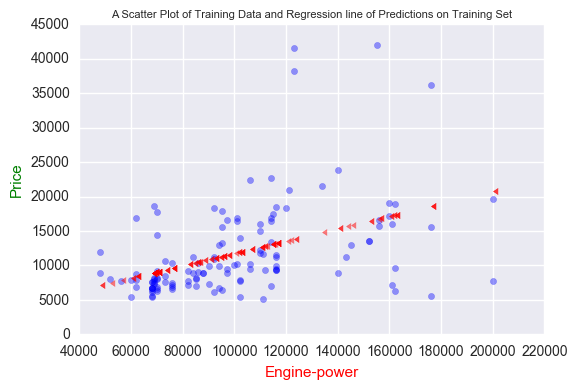

In [200]:
# Your code goes here
x_train_pre = lm.predict(x_train) 
plt.scatter(x_train, y_train, alpha = 0.4, color = 'blue')
plt.scatter(x_train, x_train_pre, color='red', marker = 4, alpha = 0.5)
plt.title('A Scatter Plot of Training Data and Regression line of Predictions on Training Set',fontsize = 8)
plt.xlabel('Engine-power', color = 'red')
plt.ylabel('Price', color = 'green')
plt.show()

<span style="color:red">Good</span>

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*
When a small data set is used to train the model in this way and then predict on a large data set, it will be significantly different from the true value.


<span style="color:red">Good</span>

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [201]:
# Your code goes here
kf = KFold(len(x), n_folds=5, shuffle = True, random_state = 0)

<span style="color:red">Good</span>

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [202]:
# Your code goes here
count = 0
for train_index, test_index in kf:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    count += 1
    print("the mean value of the price variable for the training instances in fold %d = " %(count), y_train.mean())

the mean value of the price variable for the training instances in fold 1 =  11853.2677165
the mean value of the price variable for the training instances in fold 2 =  11635.976378
the mean value of the price variable for the training instances in fold 3 =  11689.8740157
the mean value of the price variable for the training instances in fold 4 =  11709.8267717
the mean value of the price variable for the training instances in fold 5 =  11535.84375


<span style="color:red">Good</span>

### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [203]:
# Your code goes here
lm_new = LinearRegression(normalize = True)
predicted_new = cross_val_predict(lm_new, x, y, cv =kf)
print(predicted_new.shape, y.shape)

(159,) (159,)


<span style="color:red">Good</span>

### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [204]:
# Your code goes here
r2 = r2_score(y, predicted_new)  
rmse = mean_squared_error(y, predicted_new) ** 0.5
mae = mean_absolute_error(y, predicted_new)

cc = np.corrcoef(y, predicted_new)[0, 1]
print("R2 = {}\nRMSE = {}\nMAE = {}\nCC = {}".format(r2, rmse, mae, cc))

R2 = 0.173005270976
RMSE = 6114.45211862
MAE = 3987.95779619
CC = 0.417122199043


<span style="color:red">Good</span>

### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*
They intend to estimate the accuracy of the model. The MAE and RMSE measure the errors between the true values and predicted values. The CC measures the correlation of the dataset.

In the above results, a is large, cc is small, so ep is not enough to predict the price. In the above results, The MAE and RMSE are large, cc is small, so energe-power is not enough to predict the price. So their relevance is not enough.

<span style="color:red">Relating these metrics to our observations in Question 1.5, we can see that the correlation coefficient indicates that the engine-power variable explains a reasonable degree of the variance in car prices (i.e. there is a small positive correlation between the prices predicted using this variable in our model vs. the actual car prices). Furthermore there is a fairly large difference between the MAE and RMSE indicating that there might be large outlying points in the dataset (RMSE is more sensitive to extreme values than MAE). Both of these observations were suggested by our visualization in Question 1.5.</span>

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

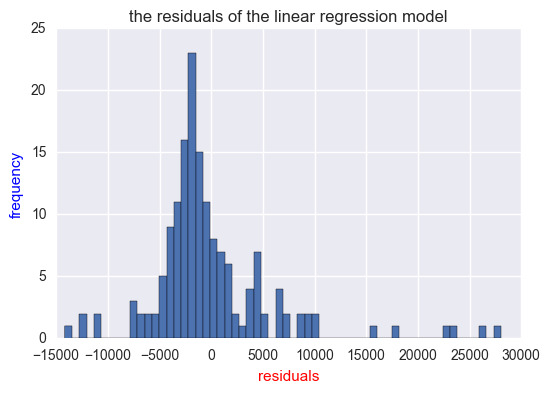

In [205]:
# Your code goes here
dis = plt.hist(y - predicted_new, bins = 60)
plt.xlabel('residuals', color = 'red')
plt.ylabel('frequency', color = 'blue')
plt.title(r'the residuals of the linear regression model', fontsize = 12)
plt.show()

<span style="color:red">Good</span>

*Your answer goes here*
A little bit different. Most of the residuals are clustered together, but some will be very large or very small.

But many predictions are much larger than the true values


<span style="color:red">Residual error follows normal distribution. This is a good sign, since normality of errors is a fundamental assumption of the linear regression model.</span>

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [206]:
# Your code goes here
auto_base_loc = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(auto_base_loc)

x_new = auto_base['engine-power']
y_new = auto_base['price']
x_new = x_new.reshape(auto_base.shape[0], 1)
kf = KFold(len(auto_base), n_folds = 5, shuffle = True, random_state = 0)

lm_base = LinearRegression(normalize = True)
predicted_base = cross_val_predict(lm_base, x_new, y_new, cv = kf)

r2_base = r2_score(y_new, predicted_base)  
rmse_base = mean_squared_error(y_new, predicted_base) ** 0.5
mae_base = mean_absolute_error(y_new, predicted_base)
cc_base = np.corrcoef(y_new, predicted_base)[0,1]
print("R2 = {}\nRMSE = {}\nMAE = {}\nCC = {}".format(r2_base, rmse_base, mae_base, cc_base))

R2 = -0.00213595381121
RMSE = 6730.84360395
MAE = 4901.86096203
CC = -0.0619144160589


<span style="color:red">Good</span>

### ========== Question 1.23 ==========
Show a scatter plot of predicted vs. true price and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

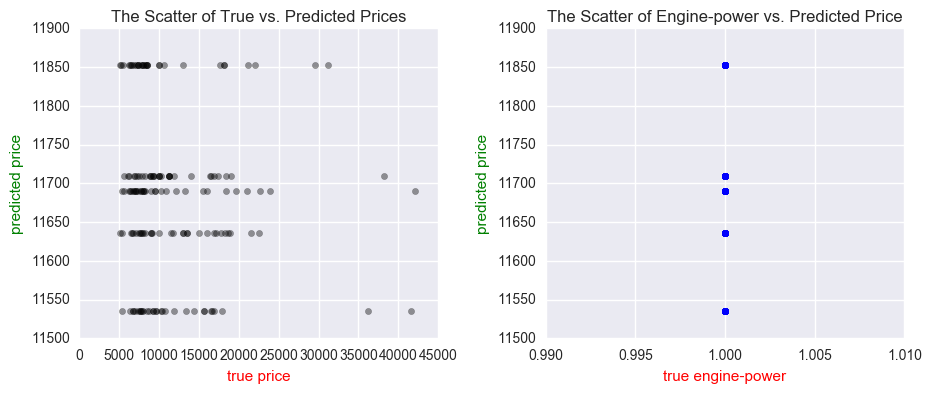

In [207]:
# Your code goes here
plt.figure()
plt.subplot(121)
plt.scatter(y_new, predicted_base, alpha = 0.4, color = 'black')
plt.title('The Scatter of True vs. Predicted Prices')
plt.xlabel('true price', color = 'red')
plt.ylabel('predicted price', color = 'green')
plt.subplots_adjust(wspace = 0.3, right = 1.5)
plt.subplot(122)
plt.scatter(x_new, predicted_base, alpha = 0.4, color = 'blue')
plt.title('The Scatter of Engine-power vs. Predicted Price')
plt.xlabel('true engine-power', color = 'red')
plt.ylabel('predicted price',  color = 'green')
plt.show()

<span style="color:red">Good</span>

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*
The simplest linear regression model is the sum of y divided by the sum of x equal to the coefficient, the constant is zero. No, in the simplest linear regression, all predicted values are the same.

<span style="color:red">A simple baseline for regression is the naive mean predictor (i.e. a model that just predicts the mean value of the prices). Relating this to the model we have built we can see that the model is actually the naive mean predictor: it outputs a constant value no matter what the value of engine-power. The five constant predicted values correspond to the mean price values in each of the folds used whithin cross-validation.</span>

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [208]:
# Your code goes here
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


*Your answer goes here*



<span style="color:red">Not Answered!</span>

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

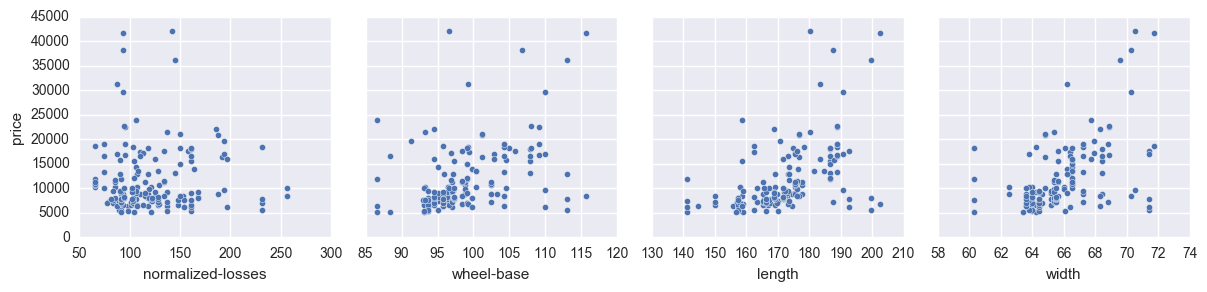

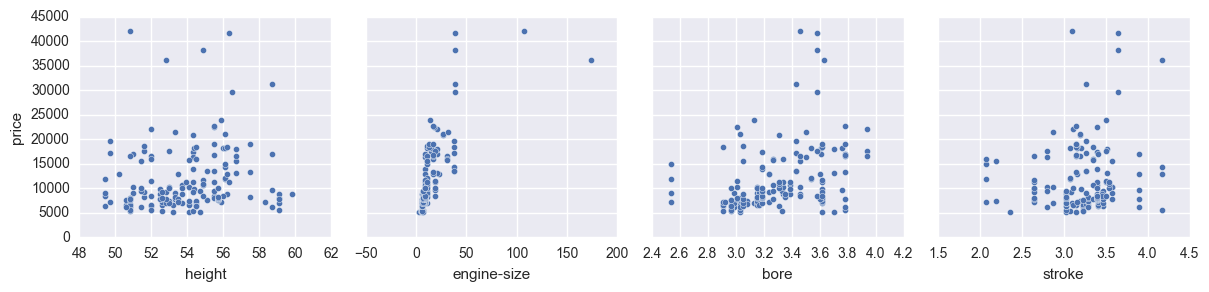

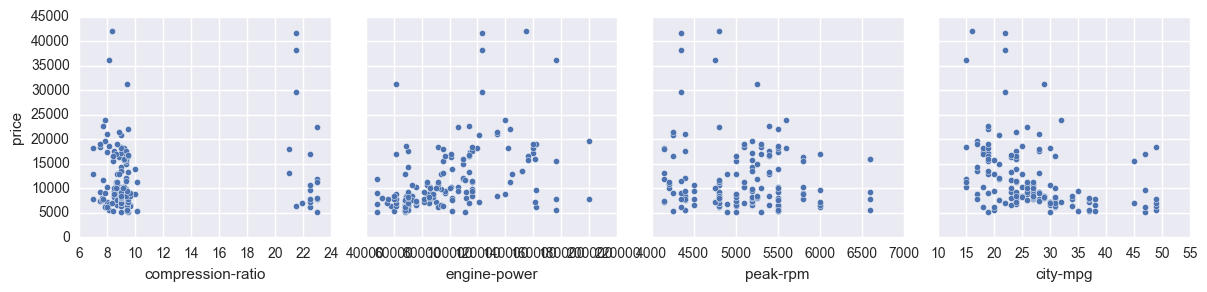

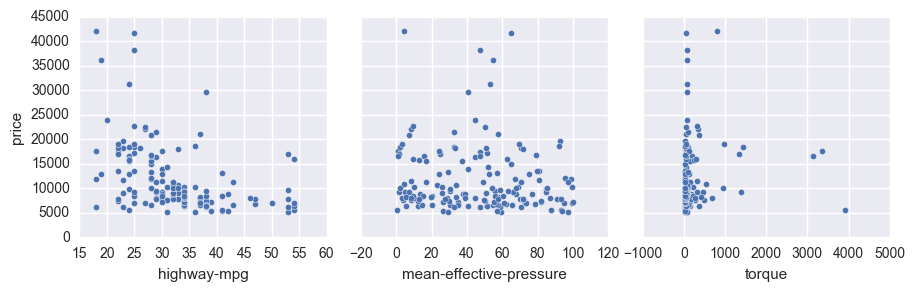

In [209]:
# Your code goes here
auto_numeric_attri = auto_numeric.drop(['price'],axis=1).columns
pairplot1 = sns.pairplot(data = auto_numeric, x_vars = auto_numeric_attri[0:4], y_vars = 'price', size = 3)
pairplot2 = sns.pairplot(data = auto_numeric, x_vars = auto_numeric_attri[4:8], y_vars = 'price', size = 3)
pairplot3 = sns.pairplot(data = auto_numeric, x_vars = auto_numeric_attri[8:12], y_vars = 'price', size = 3)
pairplot4 = sns.pairplot(data = auto_numeric, x_vars = auto_numeric_attri[12:], y_vars = 'price', size = 3)

*Your answer goes here*
The compression-ratio and torqque are useless because they are in a small range while the price in a large range. So that using these to predict the price is unpossible. And the length and width are particularly good at predicting the price. The compression-ratip can be safely removed.


<span style="color:red">1. What are the attributes that are correlated with each other? 2. Useless attributes can be removed. 3. One of the two attributes exhibiting correlation with each other (and not the price) can be removed as both attributes are correlated and do not provide extra information.</span>

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [210]:
# Your code goes here
lm_mlr = LinearRegression(normalize = True)
x_mlr = auto_numeric.drop(labels = 'price', axis = 1)
y_mlr = auto_numeric['price']
mlr_pre = cross_val_predict(lm_mlr, x, y, cv = 5)
kf = KFold(len(auto_numeric), n_folds = 5, shuffle = True, random_state = 0)
predicted_mlr = cross_val_predict(lm_mlr, x_mlr, y_mlr, cv = kf)

<span style="color:red">Good</span>

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [211]:
# Your code goes here
rmse_mlr = mean_squared_error(y_mlr, predicted_mlr) ** 0.5
mae_mlr = mean_absolute_error(y_mlr, predicted_mlr)
cc_mlr = np.corrcoef(y_mlr, predicted_mlr)[0,1]
print("RMSE = {}\nMAE = {}\nCC = {}".format(rmse_mlr, mae_mlr, cc_mlr))

RMSE = 4819.80464283
MAE = 3050.34459963
CC = 0.742560270537


<span style="color:red">Good</span>

### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*
The CC in Question 2.3 is twice as that in question 1.19, and the RMSE and MAE in 2.3 are smaller than those in 1.19. That means 2.3 are better at predicting the price.


<span style="color:red">Good</span>

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

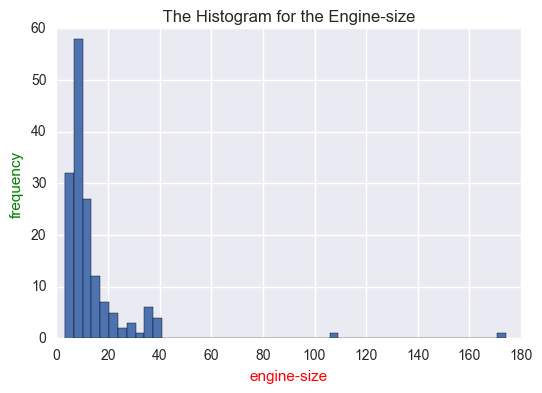

In [212]:
# Your code goes here
dis = plt.hist(auto_numeric['engine-size'], bins = 50)
plt.xlabel('engine-size', color = 'red')
plt.ylabel('frequency', color = 'green')
plt.title(r' The Histogram for the Engine-size ', fontsize = 12)
plt.show()

<span style="color:red">Good</span>

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*  
Yes. Beacuse the distribution is dense and most of them just in the range of 3-10, using it to predict the price became difficult and the outliers is obvious.



<span style="color:red">The problem here is that the engine-size attribute has a highly (positive) skewed distribution (mean >> median) that needs to be transformed by applying the logarithm (or square root) to the attribute.</span>

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

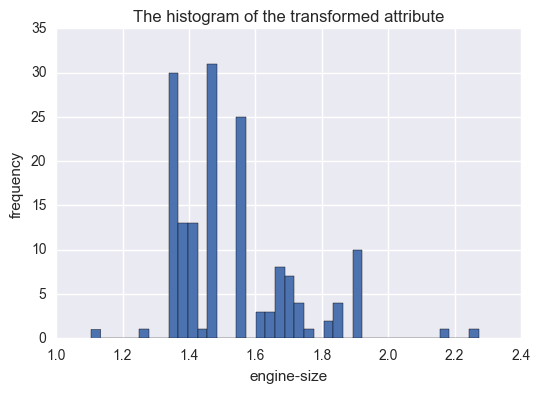

In [213]:
# Your code goes here
auto_numeric2 = auto_numeric.copy(deep=True)
auto_numeric2['engine-size'] = np.log(auto_numeric['engine-size'])
plt.hist(np.sqrt(auto_numeric2['engine-size']), bins = 40)
plt.title('The histogram of the transformed attribute')
plt.xlabel('engine-size')
plt.ylabel('frequency')
plt.show()

<span style="color:red">Either log or sqrt transformation is sufficient.</span>

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [214]:
# Your code goes here
lr_tr = LinearRegression(normalize=True)
x_tr = auto_numeric2.drop(['price'],axis=1)
kf = KFold(len(auto_numeric), n_folds = 5, shuffle = True, random_state = 0)
predicted_tr = cross_val_predict(lr_tr, x_tr, y, cv = kf)
rmse_tr = mean_squared_error(predicted_tr, y) ** 0.5
mae_tr = mean_absolute_error(y, predicted_tr)
cc_tr = np.corrcoef(predicted_tr,y)[1,0]
r2_tr = r2_score(predicted_tr, y)
print("R2 = {}\nRMSE = {}\nMAE = {}\nCC = {}".format(r2_tr, rmse_tr, mae_tr, cc_tr))

R2 = 0.596424634294
RMSE = 3745.91959756
MAE = 2668.36429567
CC = 0.831675321658


<span style="color:red">Good</span>

### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*  
The model became better, because the error of model became smaller and the CC became larger than before.



<span style="color:red">Good</span>

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [215]:
pd.set_option('max_columns', 30)

In [216]:
# Your code goes here
auto_full_loc = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(auto_full_loc, delimiter = ',')
print("the number of samples is: {}".format(auto_full.shape[0]))
print("the number of attributes is: {}".format(auto_full.shape[1] - 1))
auto_full.head(20)

the number of samples is: 159
the number of attributes is: 26


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


<span style="color:red">Good</span>

### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*  
The categorical variables: make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, fuel-system and symboling. In the regression, we can only use the positive norminal attributes which are string type or negative norminal attributes. 


<span style="color:red">The categorical variables are:
* `make`
* `fuel-type`
* `aspiration`
* `num-of-doors`
* `body-style`
* `drive-wheels`
* `engine-location`
* `engine-type`
* `num-of-cylinders`
* `fuel-system`
* `symboling`

<span style="color:red">To incorporate categorical variables into a regression model, we must create dummy variables, also called indicator (binary) variables as it makes no sense to multiply a string value e.g. "audi" by a number (i.e. the regression coefficient). Creating dummy variables is a process of mapping one column of categorical data into several columns of 0 and 1 data.</span>

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [217]:
# Your code goes here
auto_full_edit = auto_full.copy(deep=True)
attributes = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'symboling']
labelE = []
for i in range(len(attributes)):
    labelE.append(LabelEncoder())
for index,item in enumerate(attributes):
    labelE[index].fit(auto_full_edit[item])
    auto_full_edit[item] = labelE[index].transform(auto_full_edit[item])
enc = OneHotEncoder(categorical_features=np.array([1,2,3,4,5,6,7,12,13,15,23]))
x = auto_full_edit.drop(['price'],axis=1).values
enc.fit(x)
x_enc = enc.transform(x).toarray()
print("the shape of X_enc is: ",x_enc.shape)

the shape of X_enc is:  (159, 70)


<span style="color:red">Ok. You don't need to use X_enc = enc.transf or *.toarray() conversion. OneHotEncoder does it automatically. Hence the results are highly erronous.</span>

### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [219]:
# Your code goes here
y = auto_full_edit['price']
lm_full = LinearRegression(normalize=True)
kf = KFold(auto_full_edit.shape[0], n_folds=5,shuffle=True,random_state=0)
y_pred = cross_val_predict(lm_full, x_enc, y ,cv=kf)
rmse_full = mean_squared_error(y_pred, y) ** 0.5
mae_full = mean_absolute_error(y, y_pred)
cc_full = np.corrcoef(y_pred,y)[1,0]
r2_full = r2_score(y_pred,y)
print("R2 = {}\nRMSE = {}\nMAE = {}\nCC = {}".format(r2_full, rmse_full, mae_full, cc_full))

R2 = -0.0120891677838
RMSE = 1.23030752461e+16
MAE = 2.12751210375e+15
CC = 0.27849138925


<span style="color:red">Good</span>

### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*  
The model in question 2.8 is better than that in question 2.3.   
The advantage is it performs less mistakes in training data.   
The disadvantage is adding too many addtional attributes which may ask more calculating time and outliers in training data will cause more mistakes.


<span style="color:red">Good. Disadvantages: reduced interpretability, high computational resources, need for more training data</span>

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [220]:
# Your code goes here
dtr = DecisionTreeRegressor(random_state=0)
kf = KFold(auto_full_edit.shape[0], n_folds=5,shuffle=True,random_state=0)
y_pred = cross_val_predict(dtr, x_enc, y ,cv=kf)
rmse_dtr = mean_squared_error(y_pred, y) ** 0.5
mae_dtr = mean_absolute_error(y, y_pred)
cc_dtr = np.corrcoef(y_pred,y)[1,0]
r2_dtr = r2_score(y_pred,y)
print("R2 = {}\nRMSE = {}\nMAE = {}\nCC = {}".format(r2_dtr, rmse_dtr, mae_dtr, cc_dtr))

R2 = 0.662085891199
RMSE = 3866.64261351
MAE = 2388.76100629
CC = 0.833490056431


*Your answer goes here*
The perfomances became worse, because the CC became smaller and the error became larger. Because the training data is continous and not fit classier.

<span style="color:red">The performance of Multivariate Linear Regression is supposed to be better than that achieved by the Decision Tree Regressor. The Random Forest Regressor performs substantially better than DT, but slightly worse than Linear Regression. That implies that the performed feature engineering (if correctly performed) was succesful in capturing the variance of the price variable.</span>